In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
left_data = pd.read_csv('left_dataset.csv')
right_data = pd.read_csv('right_dataset.csv')

In [3]:
left_data.head()

,business_id,name,address,city,state,zip_code,size
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762-4726,11.0
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626-3030,12.0
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614,8.0


In [4]:
right_data.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123.0,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054.0,"Brewpubs, Breweries, Food"
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144.0,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


In [5]:
left_data.shape

(98509, 7)

In [6]:
right_data.shape

(94585, 7)

## Visualization

In [7]:
addr = []
for i in left_data['address'].str.lower().values.tolist():
    i = i.split(' ')
    addr.extend(i)
    
for i in right_data[~right_data['address'].isna()]['address'].str.lower().values.tolist():
    i = i.split(' ')
    addr.extend(i)

In [8]:
addr_freq = Counter(addr)
addr_df = pd.DataFrame(sorted(addr_freq.items(),key=lambda x:x[1],reverse=True))

In [9]:
addr_dict = {'st': 'street',
 'ave': 'avenue',
 'rd': 'road',
 'ste': 'suite',
 'n': 'north',
 's': 'south',
 'blvd': 'boulevard',
 'w': 'west',
 'e': 'east',
 'dr': 'drive',
 'hwy': 'highway',
 'us': 'united states'}

In [10]:
addr_dict

{'st': 'street',
 'ave': 'avenue',
 'rd': 'road',
 'ste': 'suite',
 'n': 'north',
 's': 'south',
 'blvd': 'boulevard',
 'w': 'west',
 'e': 'east',
 'dr': 'drive',
 'hwy': 'highway',
 'us': 'united states'}

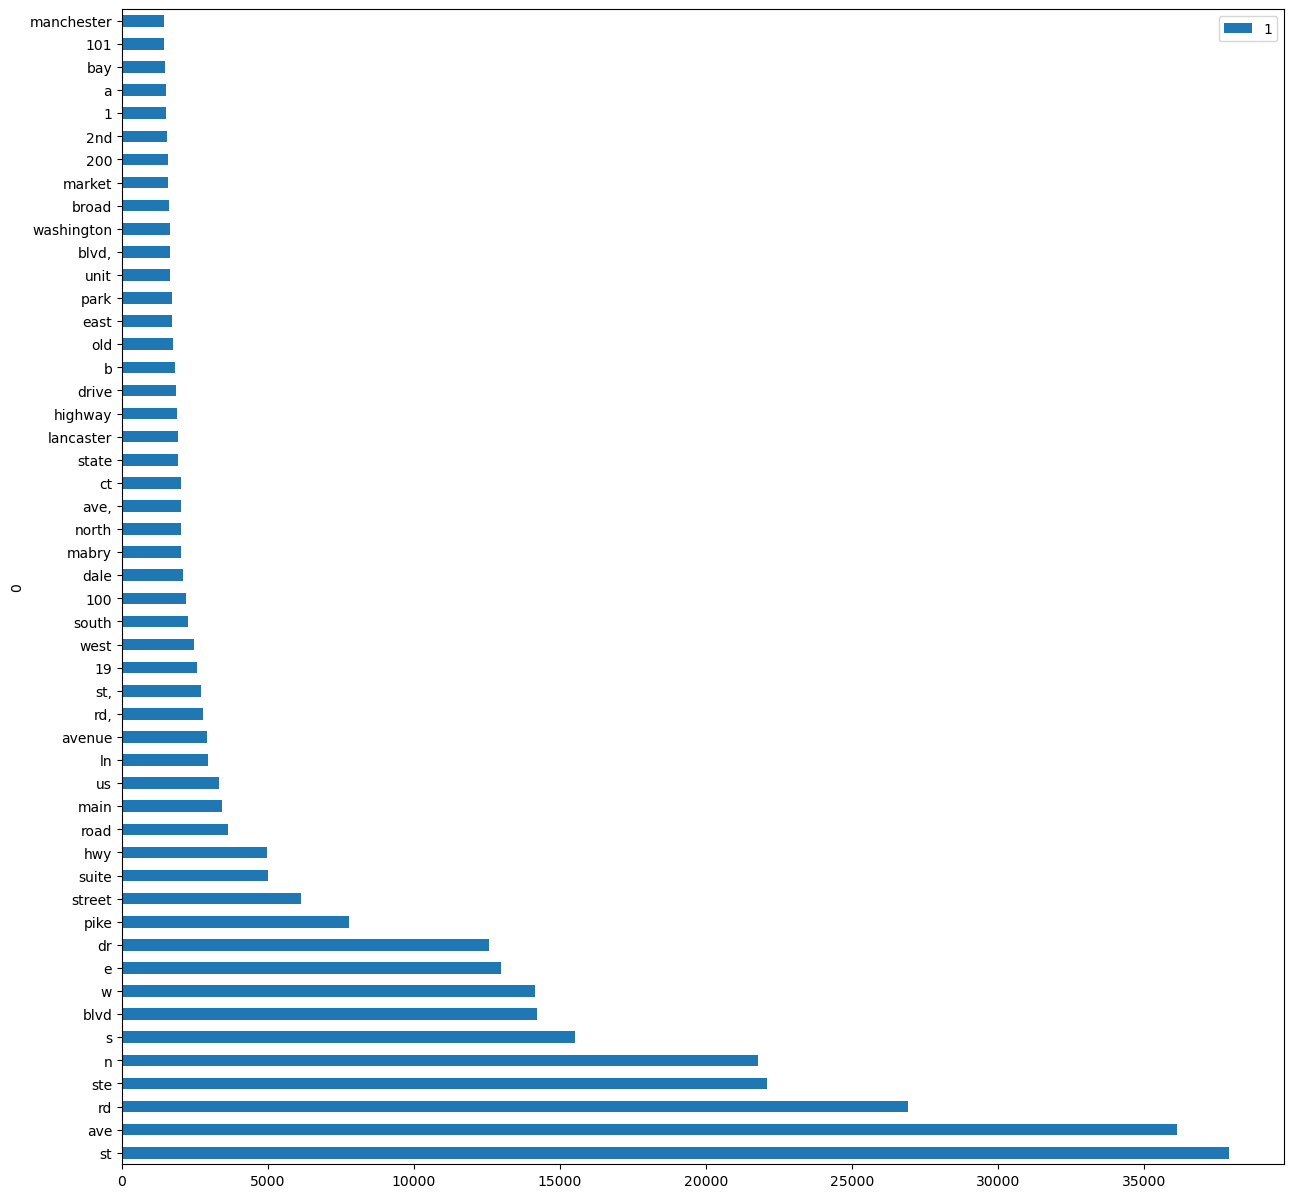

In [11]:
#plt.figure(figsize = (40,0))
addr_df.head(50).set_index(0).plot(kind='barh',figsize = (15,15))
plt.show();

In [12]:
add_word = addr_df.head(50).set_index(0)

In [13]:
def visualization(data, kind='barh', a=10, b=10):
    return data.plot(kind=kind,figsize = (a,b))

<AxesSubplot:>

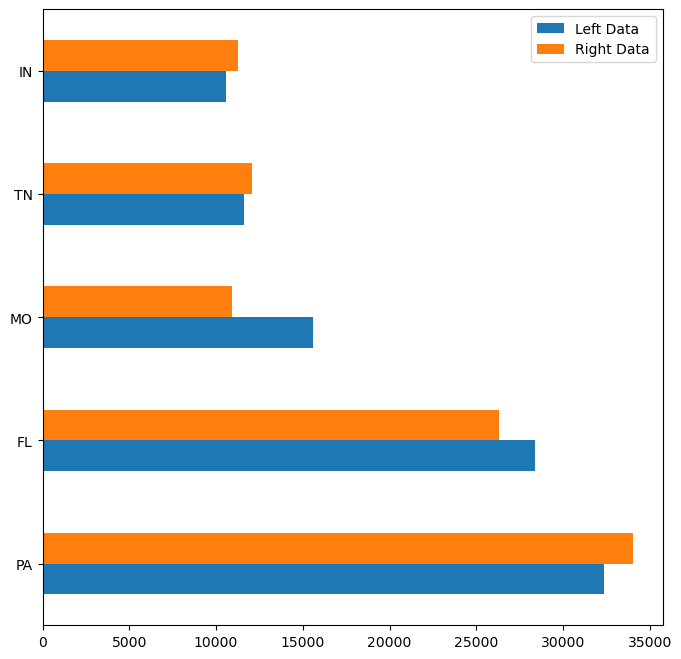

In [14]:
left_state=left_data['state'].value_counts()
right_state=right_data['state'].value_counts()
# Concatenate the data into a single dataframe
data = pd.concat([left_state, right_state], axis=1, keys=['Left Data', 'Right Data'])

visualization(data, a = 8, b = 8)

<AxesSubplot:>

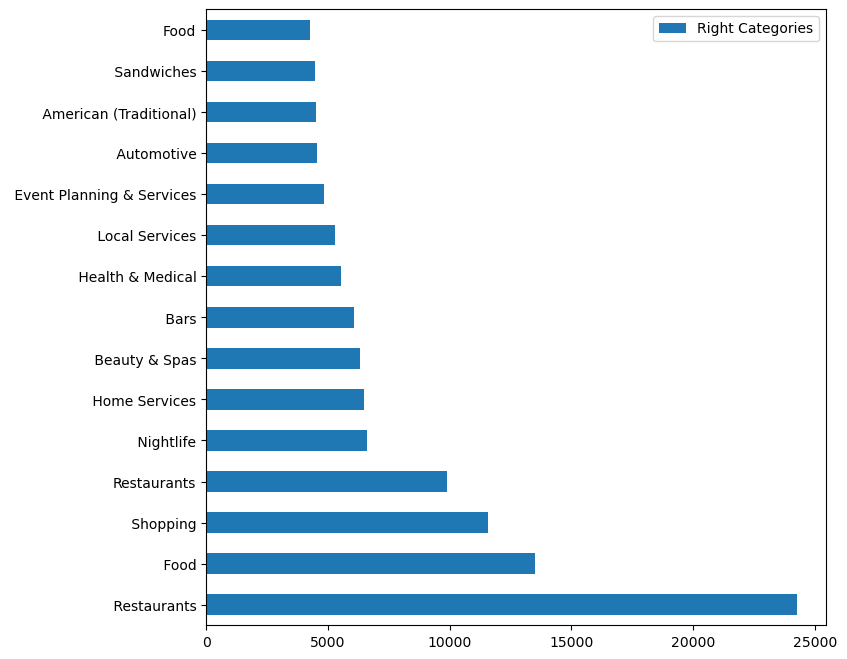

In [15]:
right_categories = right_data['categories'].str.split(',').explode().value_counts().head(15)

# Create a dataframe from the value counts series
data = pd.DataFrame({'Right Categories': right_categories})

# Call the visualization function with the data
visualization(data, a=8, b=8)

In [16]:
left_data.isna().sum()/len(left_data)

business_id    0.0
name           0.0
address        0.0
city           0.0
state          0.0
zip_code       0.0
size           0.0
dtype: float64

In [17]:
right_data.isna().sum()/len(right_data)

entity_id      0.000000
name           0.000000
address        0.029582
city           0.000000
state          0.000000
postal_code    0.000391
categories     0.000655
dtype: float64

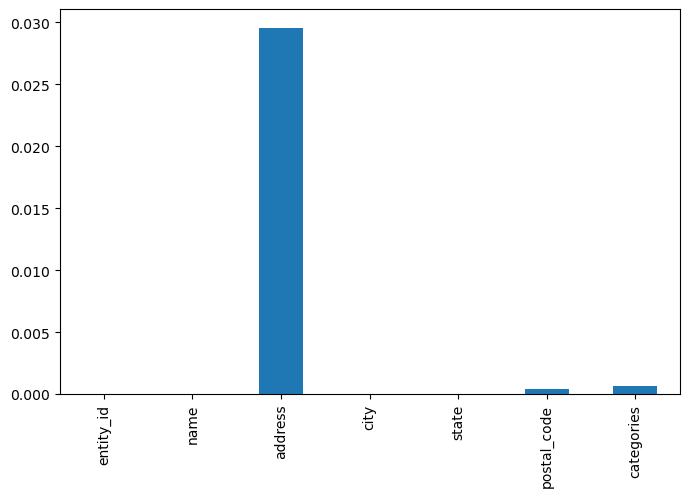

In [18]:
(right_data.isna().sum()/len(right_data)).plot(kind='bar',figsize = (8,5))
plt.show();

In [19]:
left_data[~left_data['zip_code'].isna()]['zip_code'].str[:5].value_counts()

37203    1339
37064    1217
19103    1176
37211    1078
33511    1073
         ... 
19023       1
33738       1
33601       1
19060       1
37075       1
Name: zip_code, Length: 466, dtype: int64

In [20]:
left_data['zip'] = left_data['zip_code'].str[:5]

In [21]:
right_data[~right_data['postal_code'].isna()]['postal_code'].astype(str).str[:5].value_counts()

19103    1361
19107    1353
19147    1255
37203    1179
33511     940
         ... 
38066       1
46211       1
37130       1
37604       1
33595       1
Name: postal_code, Length: 743, dtype: int64

In [22]:
right_data['zip'] = right_data['postal_code'].astype(str).str[:5]

In [23]:
right_data['address'].astype(str).str.split(' ',expand=True,n=1)[0]

0          87
1         935
2         101
3         615
4        8522
         ... 
94580    1108
94581    2625
94582    2813
94583    6020
94584     238
Name: 0, Length: 94585, dtype: object

In [24]:
left_data['address_no'] = left_data['address'].astype(str).str.split(' ',expand=True,n=1)[0]
right_data['address_no'] = right_data['address'].astype(str).str.split(' ',expand=True,n=1)[0]

In [25]:
left_data['state'].value_counts()

PA    32335
FL    28373
MO    15613
TN    11613
IN    10575
Name: state, dtype: int64

In [26]:
right_data['state'].value_counts()

PA    34039
FL    26330
TN    12056
IN    11247
MO    10913
Name: state, dtype: int64

In [27]:
left_data['city'].value_counts()

Philadelphia    10018
TAMPA            7507
Tampa            7008
SAINT LOUIS      6865
PHILADELPHIA     5661
                ...  
PHiladelphia        1
fenton              1
BRANDOn             1
st. louis           1
iNDIANAPOLIS        1
Name: city, Length: 155, dtype: int64

In [28]:
len(set(left_data['city'].value_counts().index) & set(right_data['city'].value_counts().index))

80

In [29]:
left_data['name'].value_counts()

RON MORA                                                    10
COUSIN'S FRESH MARKET INC                                    4
HEADS UP SALON                                               4
LUTHERAN CHURCH OF THE RESURRECTION                          4
GREEK CAFE                                                   4
                                                            ..
SHI KAY INC                                                  1
MICHAEL MCDANIEL                                             1
RANDALL LAW OFFICES, P.C. DBA RANDALL, GENTRY &AMP; PIKE     1
ECO SPORTS GROUP, INC                                        1
THE AQUADUCKS LLC                                            1
Name: name, Length: 86341, dtype: int64

In [30]:
right_data['name'].value_counts()

Starbucks                        448
McDonald's                       440
Dunkin'                          387
Subway                           279
Taco Bell                        247
                                ... 
Ten Stone Bar & Restaurant         1
Walsh & Son                        1
The Wandering Eye Art Gallery      1
Henry Nails                        1
Sic Ink                            1
Name: name, Length: 72238, dtype: int64

## Matching Algorithm

In [31]:
right_data['postal_code'] = right_data['postal_code'].fillna(-1).astype(int)

right_data.head()

,entity_id,name,address,city,state,postal_code,categories,zip,address_no
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,"Shipping Centers, Local Services, Notaries, Ma...",63123,87
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",19107,935
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,"Brewpubs, Breweries, Food",18054,101
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",37015,615
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,"Sporting Goods, Fashion, Shoe Stores, Shopping...",63144,8522


In [32]:
addr = []
for i in left_data['address'].str.lower().values.tolist():
    i = i.split(' ')
    addr.extend(i)
    
for i in right_data[~right_data['address'].isna()]['address'].str.lower().values.tolist():
    i = i.split(' ')
    addr.extend(i)
print(addr[:10])

['12800', '44th', 'st', 'n', '1905', 'e', '19th', 'ave', '1988', 'gulf']


In [33]:
addr_freq = Counter(addr)
addr_df = pd.DataFrame(sorted(addr_freq.items(),key=lambda x:x[1],reverse=True))
print(addr_df[:50])

             0      1
0           st  37924
1          ave  36135
2           rd  26910
3          ste  22110
4            n  21784
5            s  15532
6         blvd  14222
7            w  14135
8            e  12996
9           dr  12562
10        pike   7791
11      street   6134
12       suite   4988
13         hwy   4970
14        road   3636
15        main   3417
16          us   3325
17          ln   2937
18      avenue   2912
19         rd,   2769
20         st,   2694
21          19   2560
22        west   2483
23       south   2264
24         100   2186
25        dale   2098
26       mabry   2038
27       north   2037
28        ave,   2032
29          ct   2020
30       state   1930
31   lancaster   1917
32     highway   1902
33       drive   1840
34           b   1833
35         old   1754
36        east   1728
37        park   1724
38        unit   1664
39       blvd,   1652
40  washington   1633
41       broad   1607
42      market   1588
43         200   1585
44        

In [34]:
addr_dict = {'st': 'street',
 'ave': 'avenue',
 'rd': 'road',
 'ste': 'suite',
 'n': 'north',
 's': 'south',
 'blvd': 'boulevard',
 'w': 'west',
 'e': 'east',
 'dr': 'drive',
 'hwy': 'highway',
 'us': 'united states',
 'ln':'lane',
 'pike':'turnpike',
 'ct':'court',
 'cir':'circle',
 'pl':'place',
 'dr':'drive',
 'pkwy':'parkway',
 'apt': 'apartment',
 'c': 'suite',
 'fl': 'floor'}

In [35]:
addr_dict

{'st': 'street',
 'ave': 'avenue',
 'rd': 'road',
 'ste': 'suite',
 'n': 'north',
 's': 'south',
 'blvd': 'boulevard',
 'w': 'west',
 'e': 'east',
 'dr': 'drive',
 'hwy': 'highway',
 'us': 'united states',
 'ln': 'lane',
 'pike': 'turnpike',
 'ct': 'court',
 'cir': 'circle',
 'pl': 'place',
 'pkwy': 'parkway',
 'apt': 'apartment',
 'c': 'suite',
 'fl': 'floor'}

In [36]:
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [37]:
state_dict

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

In [38]:
left_data['zip'] = left_data['zip_code'].str[:5]

In [39]:
right_data['zip'] = right_data['postal_code'].astype(str).str[:5]

In [40]:
left_data['address_no'] = left_data['address'].astype(str).str.split(' ',expand=True,n=1)[0]
right_data['address_no'] = right_data['address'].astype(str).str.split(' ',expand=True,n=1)[0]

In [41]:
cop = re.compile("[^a-z^A-Z^0-9]")

In [42]:
# state简写
def text_clean(texta,textb):
    texta,textb = texta.lower(),textb.lower()
    texta = cop.sub(' ', texta)
    texta = [addr_dict[i] if addr_dict.get(i) else i for i in texta.split()]
    texta = [state_dict[i] if state_dict.get(i) else i for i in texta]
    
    textb = cop.sub(' ', textb)
    textb = [addr_dict[i] if addr_dict.get(i) else i for i in textb.split()]
    textb = [state_dict[i] if state_dict.get(i) else i for i in textb]
   
    A = set(texta)
    B = set(textb)
    score =  len(A & B) / len(A | B)
    return score

In [43]:
%%time

# combine_state = pd.merge(left_data,right_data,on=['state','address_no'])
combine_state = pd.merge(left_data,right_data,on=['state','zip','address_no'])

CPU times: user 159 ms, sys: 12.2 ms, total: 171 ms
Wall time: 173 ms


In [44]:
combine_state.head()

,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories
0,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0,33605,1905,60644,Quality Roofing,1905 N 40th St,Tampa,33605,"Air Duct Cleaning, Home Services, Roofing, Met..."
1,26717,COSTIN GRAPHICS INC,1905 n 36TH ST,TAMPA,FL,33605-4437,4.0,33605,1905,60644,Quality Roofing,1905 N 40th St,Tampa,33605,"Air Duct Cleaning, Home Services, Roofing, Met..."
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0,33765,1988,69344,Tampa Bay Mobile,"1988 Sherwood St, Ste 21",Tampa Bay,33765,"Car Wash, Auto Detailing, Home Services, Car W..."
3,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0,33765,1988,76311,Comprehensive Spine Institute,1988 Gulf To Bay Blvd,Clearwater,33765,"Orthopedists, Spine Surgeons, Physical Therapy..."
4,7,JAZZ HOUSE SUPPER CLUB LLC,9331 E Adamo Dr,Tampa,FL,33619-2682,30.0,33619,9331,15925,Jazz House Supper Club,9331 E Adamo Dr,Tampa,33619,"Event Planning & Services, Arts & Entertainmen..."


In [45]:
%%time
combine_state['score'] = combine_state.apply(lambda x: text_clean(x['address_x'],x['address_y']),axis=1)

combine_state.head()

CPU times: user 3.84 s, sys: 70 ms, total: 3.91 s
Wall time: 4.01 s


,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories,score
0,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0,33605,1905,60644,Quality Roofing,1905 N 40th St,Tampa,33605,"Air Duct Cleaning, Home Services, Roofing, Met...",0.142857
1,26717,COSTIN GRAPHICS INC,1905 n 36TH ST,TAMPA,FL,33605-4437,4.0,33605,1905,60644,Quality Roofing,1905 N 40th St,Tampa,33605,"Air Duct Cleaning, Home Services, Roofing, Met...",0.600000
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0,33765,1988,69344,Tampa Bay Mobile,"1988 Sherwood St, Ste 21",Tampa Bay,33765,"Car Wash, Auto Detailing, Home Services, Car W...",0.200000
3,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0,33765,1988,76311,Comprehensive Spine Institute,1988 Gulf To Bay Blvd,Clearwater,33765,"Orthopedists, Spine Surgeons, Physical Therapy...",0.714286
4,7,JAZZ HOUSE SUPPER CLUB LLC,9331 E Adamo Dr,Tampa,FL,33619-2682,30.0,33619,9331,15925,Jazz House Supper Club,9331 E Adamo Dr,Tampa,33619,"Event Planning & Services, Arts & Entertainmen...",1.000000


In [46]:
combine1_state = combine_state[combine_state['score']>=0.8]
combine2_state = combine1_state.sort_values(by='score', ascending=False).groupby('business_id', as_index=False).first()
combine2_state.head()

,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories,score
0,7,JAZZ HOUSE SUPPER CLUB LLC,9331 E Adamo Dr,Tampa,FL,33619-2682,30.0,33619,9331,15925,Jazz House Supper Club,9331 E Adamo Dr,Tampa,33619,"Event Planning & Services, Arts & Entertainmen...",1.0
1,14,DAY'S COLLISION,975 Florida Ave,Palm Harbor,FL,34683-4224,12.0,34683,975,15883,Day's Collision Painting & Repair,975 Florida Ave,Palm Harbor,34683,"Towing, Auto Repair, Body Shops, Automotive, T...",1.0
2,16,SAMURAI BLUE INC,1600 E 8th Ave Ste C208,Tampa,FL,33605-3740,22.0,33605,1600,34735,Samurai Blue Sushi & Sake Bar,"1600 E 8th Ave, Ste C208",Tampa,33605,"Restaurants, Japanese, Soup, Sushi Bars",1.0
3,17,BAUGER & TOURIN LLC,601 S Harbour Island Blvd Ste 109,Tampa,FL,33602-5927,19.0,33602,601,22466,Sam Ivy K9 Consultants,"601 S Harbour Island Blvd, Ste 109",Tampa,33602,"Pets, Pet Training, Pet Services, Dog Walkers,...",1.0
4,41,GSNP CORPORATION INC,3314 S Dale Mabry Hwy,Tampa,FL,33629-7840,10.0,33629,3314,80155,Howard Johnson Express Inn & Suites - South Ta...,3314 South Dale Mabry Hwy,Tampa,33629,"Event Planning & Services, Hotels, Hotels & Tr...",1.0


In [47]:
len(combine2_state)

22502

In [48]:
# state简写
def text_similarity(texta, textb):
    texta, textb = texta.lower(), textb.lower()
    texta = cop.sub(' ', texta)
    texta = [addr_dict[i] if addr_dict.get(i) else state_dict[i] if state_dict.get(i) else i for i in texta.split()]

    textb = cop.sub(' ', textb)
    textb = [addr_dict[i] if addr_dict.get(i) else state_dict[i] if state_dict.get(i) else i for i in textb.split()]

    A = set(texta)
    B = set(textb)
    score = len(A & B) / len(A | B)
    return score

combine2_state['name_similarity'] = combine2_state.apply(lambda x: text_similarity(x['name_x'], x['name_y']), axis=1)

In [49]:
combine2_state.head()

,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories,score,name_similarity
0,7,JAZZ HOUSE SUPPER CLUB LLC,9331 E Adamo Dr,Tampa,FL,33619-2682,30.0,33619,9331,15925,Jazz House Supper Club,9331 E Adamo Dr,Tampa,33619,"Event Planning & Services, Arts & Entertainmen...",1.0,0.800000
1,14,DAY'S COLLISION,975 Florida Ave,Palm Harbor,FL,34683-4224,12.0,34683,975,15883,Day's Collision Painting & Repair,975 Florida Ave,Palm Harbor,34683,"Towing, Auto Repair, Body Shops, Automotive, T...",1.0,0.600000
2,16,SAMURAI BLUE INC,1600 E 8th Ave Ste C208,Tampa,FL,33605-3740,22.0,33605,1600,34735,Samurai Blue Sushi & Sake Bar,"1600 E 8th Ave, Ste C208",Tampa,33605,"Restaurants, Japanese, Soup, Sushi Bars",1.0,0.333333
3,17,BAUGER & TOURIN LLC,601 S Harbour Island Blvd Ste 109,Tampa,FL,33602-5927,19.0,33602,601,22466,Sam Ivy K9 Consultants,"601 S Harbour Island Blvd, Ste 109",Tampa,33602,"Pets, Pet Training, Pet Services, Dog Walkers,...",1.0,0.000000
4,41,GSNP CORPORATION INC,3314 S Dale Mabry Hwy,Tampa,FL,33629-7840,10.0,33629,3314,80155,Howard Johnson Express Inn & Suites - South Ta...,3314 South Dale Mabry Hwy,Tampa,33629,"Event Planning & Services, Hotels, Hotels & Tr...",1.0,0.000000


In [50]:
combine3_state = combine2_state[combine2_state['name_similarity'] > 0.5]
combine3_state.head(10)

,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories,score,name_similarity
0,7,JAZZ HOUSE SUPPER CLUB LLC,9331 E Adamo Dr,Tampa,FL,33619-2682,30.0,33619,9331,15925,Jazz House Supper Club,9331 E Adamo Dr,Tampa,33619,"Event Planning & Services, Arts & Entertainmen...",1.000000,0.800
1,14,DAY'S COLLISION,975 Florida Ave,Palm Harbor,FL,34683-4224,12.0,34683,975,15883,Day's Collision Painting & Repair,975 Florida Ave,Palm Harbor,34683,"Towing, Auto Repair, Body Shops, Automotive, T...",1.000000,0.600
6,54,NUTRITION SOLUTIONS,3609 N 15th St,Tampa,FL,33605-1105,33.0,33605,3609,90005,Nutrition Solutions,3609 N 15th St,Tampa,33605,"Food, Active Life, Weight Loss Centers, Food D...",1.000000,1.000
8,59,SUSHI NINJA TAMPA LLC,3018 W Kennedy Blvd,Tampa,FL,33609-3277,16.0,33609,3018,61469,Sushi Ninja Tampa,3018 W Kennedy Blvd,South Tampa,33609,"Korean, Sushi Bars, Restaurants, Japanese",1.000000,0.750
14,97,NUCCI MEDICAL CLINIC LLC,6322 Gunn Hwy,Tampa,FL,33625-4105,16.0,33625,6322,83571,Nucci Medical Clinic,6322 Gunn Hwy,Tampa,33625,"Cosmetic Surgeons, Doctors, Medical Centers, W...",1.000000,0.750
15,102,ELITE ROOFING SERVICES INC.,7710 E Broadway Ave,Tampa,FL,33619-2534,16.0,33619,7710,72520,Elite Roofing Services,7710 E Broadway Ave,Tampa,33619,"Roofing, Home Services",1.000000,0.750
17,126,OASIS IRRIGATION & LANDSCAPE INC.,3331 W Main St # B,Tampa,FL,33607-4220,26.0,33607,3331,18238,Oasis Irrigation & Landscape,"3331 W Main St, Unit B",Tampa,33607,"Irrigation, Landscaping, Home Services",0.833333,0.750
19,132,BAY AREA BEHAVIORAL SERVICES INC,126 LITHIA PINECREST RD,BRANDON,FL,33511-5347,55.0,33511,126,31300,Bay Area Behavioral Services,126 Lithia Pinecrest Rd,Brandon,33511,"Doctors, Psychiatrists, Counseling & Mental He...",1.000000,0.800
26,161,NUTRITION SOLUTIONS,3609 North 15th Street,Tampa,FL,33605,37.0,33605,3609,90005,Nutrition Solutions,3609 N 15th St,Tampa,33605,"Food, Active Life, Weight Loss Centers, Food D...",1.000000,1.000
28,164,PREMIERE CENTER FOR COSMETIC SURGERY OF TAMPA INC,2419 W Kennedy Blvd Ste 101,Tampa,FL,33609-3481,13.0,33609,2419,81026,Premiere Center for Cosmetic Surgery,"2419 W Kennedy Blvd, Ste 101",Tampa,33609,"Medical Spas, Professional Services, Health & ...",1.000000,0.625


In [51]:
len(combine3_state)

4432

In [52]:
combine3_state.loc[:, 'confidence_score'] = (combine3_state['score'] + combine3_state['name_similarity']) / 2
combine3_state = combine3_state.sort_values('confidence_score', ascending=False)

combine3_state.head(20)

/var/folders/l3/frct_lcj2f33b5620kdx1rlc0000gn/T/ipykernel_59999/2704593044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine3_state.loc[:, 'confidence_score'] = (combine3_state['score'] + combine3_state['name_similarity']) / 2


,business_id,name_x,address_x,city_x,state,zip_code,size,zip,address_no,entity_id,name_y,address_y,city_y,postal_code,categories,score,name_similarity,confidence_score
11037,55043,MORRIS ANIMAL REFUGE,1242 LOMBARD STREET,PHILADELPHIA,PA,19147,16.0,19147,1242,37643,Morris Animal Refuge,1242 Lombard St,Philadelphia,19147,"Animal Shelters, Pet Stores, Pets",1.0,1.0,1.0
8698,42020,FIRST CHRISTIAN CHURCH OF FLORISSANT,2890 Patterson Rd,Florissant,MO,63031,15.0,63031,2890,2654,First Christian Church of Florissant,2890 Patterson Rd,Florissant,63031,"Religious Organizations, Churches",1.0,1.0,1.0
15178,69696,NORTHERN LIBERTY PRESS LLC,1223 N Mascher St,Philadelphia,PA,19122,3.0,19122,1223,63898,Northern Liberty Press LLC,1223 N Mascher St,Philadelphia,19122,"Printing Services, Local Services",1.0,1.0,1.0
15135,69502,HOLT MOTORSPORTS INC,1315 W CHESTER PIKE,WEST CHESTER,PA,19382,2.0,19382,1315,93515,Holt Motorsports Inc,1315 W Chester Pike,West Chester,19382,"Automotive, Car Dealers",1.0,1.0,1.0
15098,69371,BILL CLARK & SON LANDSCAPING,7533 RIDGE AVENUE,PHILADELPHIA,PA,19128,6.0,19128,7533,54797,Bill Clark & Son Landscaping,7533 Ridge Ave,Philadelphia,19128,"Home Services, Landscaping",1.0,1.0,1.0
15075,69304,ST PATRICK S CHURCH,242 S 20TH ST,PHILADELPHIA,PA,19103,4.0,19103,242,85014,St Patrick's Church,242 S 20th St,Philadelphia,19103,"Churches, Religious Organizations",1.0,1.0,1.0
15034,69164,K-9 DESIGNS PET PARADISE INC.,92 Level Road,Collegeville,PA,19426,10.0,19426,92,74490,"K-9 Designs Pet Paradise, Inc",92 Level Rd,Collegeville,19426,"Pet Training, Pet Groomers, Pet Services, Pets...",1.0,1.0,1.0
2780,11522,DRIVE-BYE EXTERMINATORS,3444 Northridge Drive,Clearwater,FL,33761,6.0,33761,3444,80108,Drive-Bye Exterminators,3444 Northridge Dr,Clearwater,33761,"Local Services, Pest Control",1.0,1.0,1.0
15033,69163,K-9 DESIGNS PET PARADISE INC,92 Level Rd,Collegeville,PA,19426-3338,11.0,19426,92,74490,"K-9 Designs Pet Paradise, Inc",92 Level Rd,Collegeville,19426,"Pet Training, Pet Groomers, Pet Services, Pets...",1.0,1.0,1.0
5374,24645,GRAND SLAM AUTO DETAIL CENTER,1401 W SLIGH AVE,TAMPA,FL,33604,2.0,33604,1401,33898,Grand Slam Auto Detail Center,1401 W Sligh Ave,Tampa,33604,"Car Wash, Car Window Tinting, Auto Detailing, ...",1.0,1.0,1.0


In [53]:
combine3_state.describe()

,business_id,size,entity_id,postal_code,score,name_similarity,confidence_score
count,4432.000000,4432.000000,4432.000000,4432.000000,4432.000000,4432.000000,4432.000000
mean,50526.250226,8.628836,46677.594088,33314.658845,0.993607,0.761904,0.877756
std,29011.304852,8.767573,27493.891096,14413.168760,0.033922,0.125431,0.064766
min,7.000000,2.000000,2.000000,18901.000000,0.800000,0.545455,0.700000
25%,24379.000000,4.000000,22672.750000,19144.000000,1.000000,0.666667,0.833333
50%,55032.000000,6.000000,46307.500000,33616.000000,1.000000,0.750000,0.875000
75%,75829.750000,11.000000,69902.250000,37210.000000,1.000000,0.800000,0.900000
max,98462.000000,230.000000,94480.000000,63303.000000,1.000000,1.000000,1.000000


In [54]:
combine4 = combine3_state[['business_id','entity_id','confidence_score']]

In [55]:
combine4.columns = ['left_dataset', 'right_dataset', 'confidence_score']

In [56]:
combine4.to_csv('submission.csv',index=False)

In [57]:
combine4

,left_dataset,right_dataset,confidence_score
11037,55043,37643,1.0
8698,42020,2654,1.0
15178,69696,63898,1.0
15135,69502,93515,1.0
15098,69371,54797,1.0
...,...,...,...
2329,9542,86669,0.7
3778,16533,84586,0.7
4802,21946,55574,0.7
1062,4338,82343,0.7


In [58]:
combine5 = combine3_state[combine3_state['confidence_score'] < 0.8]

In [59]:
len(combine5)

172

In [60]:
100-(len(combine5)/len(combine3_state)*100)

96.11913357400722